# Réalisez une étude de santé publique avec R ou Python

## Importation donnees

In [1]:
import pandas as pd
import numpy as np
dossier='C:/Users/lenovo/OneDrive/Desktop/projet 4/DAN-P4-FAO/'

In [2]:
df_population=pd.read_csv(dossier+'population.csv')
df_population.head()

Zone  Année     Valeur
0  Afghanistan   2013  32269.589
1  Afghanistan   2014  33370.794
2  Afghanistan   2015  34413.603
3  Afghanistan   2016  35383.032
4  Afghanistan   2017  36296.113

In [3]:
df_dispo_alimentaire=pd.read_csv(dossier+'dispo_alimentaire.csv')
df_dispo_alimentaire.head()

Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    NaN   
1  Afghanistan        Agrumes, Autres  vegetale                    NaN   
2  Afghanistan  Aliments pour enfants  vegetale                    NaN   
3  Afghanistan                 Ananas  vegetale                    NaN   
4  Afghanistan                Bananes  vegetale                    NaN   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  NaN                                             5.0   
1                  NaN                                             1.0   
2                  NaN                                             1.0   
3                  NaN                                             0.0   
4                  NaN                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.72        
1                                               1.29        
2                                               0.06        
3                                               0.00        
4                                               2.70        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                               0.20               
1                                               0.01               
2                                               0.01               
3                                                NaN               
4                                               0.02               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.77          
1                                               0.02          
2                                               0.03          
3                                                NaN          
4                                               0.05          

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0                      53.0                      NaN                      NaN   
1                      41.0                      2.0                     40.0   
2                       2.0                      NaN                      2.0   
3                       0.0                      NaN                      0.0   
4                      82.0                      NaN                     82.0   

   Nourriture  Pertes  Production  Semences  Traitement  Variation de stock  
0        53.0     NaN        53.0       NaN         NaN                 NaN  
1        39.0     2.0         3.0       NaN         NaN                 NaN  
2         2.0     NaN         NaN       NaN         NaN                 NaN  
3         0.0     NaN         NaN       NaN         NaN                 NaN  
4        82.0     NaN         NaN       NaN         NaN                 NaN

In [4]:
df_aide_alimentaire=pd.read_csv('C:/Users/lenovo/OneDrive/Desktop/projet 4/DAN-P4-FAO/aide_alimentaire.csv')
df_aide_alimentaire.head()

Pays bénéficiaire  Année              Produit  Valeur
0       Afghanistan   2013  Autres non-céréales     682
1       Afghanistan   2014  Autres non-céréales     335
2       Afghanistan   2013         Blé et Farin   39224
3       Afghanistan   2014         Blé et Farin   15160
4       Afghanistan   2013             Céréales   40504

In [5]:
df_sous_nutrition=pd.read_csv(dossier+'sous_nutrition.csv')
df_sous_nutrition.head()

Zone      Année Valeur
0  Afghanistan  2012-2014    8.6
1  Afghanistan  2013-2015    8.8
2  Afghanistan  2014-2016    8.9
3  Afghanistan  2015-2017    9.7
4  Afghanistan  2016-2018   10.5

## Nettoyage des donnees

#### nettoyage dataframe population

In [6]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [7]:
df_population.head()

Zone  Année     Valeur
0  Afghanistan   2013  32269.589
1  Afghanistan   2014  33370.794
2  Afghanistan   2015  34413.603
3  Afghanistan   2016  35383.032
4  Afghanistan   2017  36296.113

#### filtre sur l'année 2017

In [8]:
df_population_2017=df_population.loc[df_population['Année'] ==2017]
print(df_population_2017)

                                        Zone  Année     Valeur
4                                Afghanistan   2017  36296.113
10                            Afrique du Sud   2017  57009.756
16                                   Albanie   2017   2884.169
22                                   Algérie   2017  41389.189
28                                 Allemagne   2017  82658.409
...                                      ...    ...        ...
1390  Venezuela (République bolivarienne du)   2017  29402.484
1396                                Viet Nam   2017  94600.648
1402                                   Yémen   2017  27834.819
1408                                  Zambie   2017  16853.599
1414                                Zimbabwe   2017  14236.595

[236 rows x 3 columns]


#### changement de nom d'une colonne

In [9]:
df_population_2017.rename( columns={'Valeur':'population'}, inplace=True )
df_population_2017.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15048\568111177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population_2017.rename( columns={'Valeur':'population'}, inplace=True )


Zone  Année  population
4      Afghanistan   2017   36296.113
10  Afrique du Sud   2017   57009.756
16         Albanie   2017    2884.169
22         Algérie   2017   41389.189
28       Allemagne   2017   82658.409

#### difference d'ecriture des pays entre les dataframe

In [10]:
df_population_2017.loc[df_population_2017['Zone']== 'Tchéquie','Zone']='Tchéquie (la)'
df_population_2017.loc[df_population_2017['Zone']== "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",'Zone']='Royaume-Uni'


In [11]:
mask=df_population_2017.Zone.str.contains('Tchéq',case=False)
df_population_2017[mask]

Zone  Année  population
1306  Tchéquie (la)   2017   10641.034

#### nettoyage dataframe aide alimentaire

In [12]:
df_aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [13]:
df_aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


#### changement de nom d'une colonne

In [14]:
df_aide_alimentaire.rename(columns = {'Pays bénéficiaire':'Zone'}, inplace = True)
df_aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Zone     1475 non-null   object
 1   Année    1475 non-null   int64 
 2   Produit  1475 non-null   object
 3   Valeur   1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


#### nettoyage dataframe sous nutrition

In [15]:
df_sous_nutrition.head()

Zone      Année Valeur
0  Afghanistan  2012-2014    8.6
1  Afghanistan  2013-2015    8.8
2  Afghanistan  2014-2016    8.9
3  Afghanistan  2015-2017    9.7
4  Afghanistan  2016-2018   10.5

#### traitement des valeurs et remplacement des valeurs vides


In [16]:
df_sous_nutrition.Valeur.fillna(0,inplace=True)

In [17]:
mask_Na=df_sous_nutrition.Valeur.isna()
df_sous_nutrition[mask_Na]

Empty DataFrame
Columns: [Zone, Année, Valeur]
Index: []

In [18]:
df_sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  1218 non-null   object
dtypes: object(3)
memory usage: 28.7+ KB


#### DETECTION ET CORRECTION DES ERREURS DANS LES VALEURS

In [19]:
df_sous_nutrition.loc[df_sous_nutrition['Valeur'] =='<0.1','Valeur'] = 0
df_sous_nutrition.loc[df_sous_nutrition['Valeur'] =='<0.1','Valeur']

Series([], Name: Valeur, dtype: object)

In [20]:
df_sous_nutrition['Valeur']=df_sous_nutrition.Valeur.astype(float)
df_sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1218 non-null   object 
 1   Année   1218 non-null   object 
 2   Valeur  1218 non-null   float64
dtypes: float64(1), object(2)
memory usage: 28.7+ KB


In [21]:
df_sous_nutrition['année']=df_sous_nutrition['Année'].apply(lambda x:int(x[:4])+1)
df_sous_nutrition.head()

Zone      Année  Valeur  année
0  Afghanistan  2012-2014     8.6   2013
1  Afghanistan  2013-2015     8.8   2014
2  Afghanistan  2014-2016     8.9   2015
3  Afghanistan  2015-2017     9.7   2016
4  Afghanistan  2016-2018    10.5   2017

In [22]:
df_sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1218 non-null   object 
 1   Année   1218 non-null   object 
 2   Valeur  1218 non-null   float64
 3   année   1218 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 38.2+ KB


In [23]:
df_sous_nutrition.loc[df_sous_nutrition['Zone'] =='Belize',]

Zone      Année  Valeur  année
120  Belize  2012-2014     0.0   2013
121  Belize  2013-2015     0.0   2014
122  Belize  2014-2016     0.0   2015
123  Belize  2015-2017     0.0   2016
124  Belize  2016-2018     0.0   2017
125  Belize  2017-2019     0.0   2018

In [24]:
df_sous_nutrition.loc[df_sous_nutrition['Valeur'] =='<0.1','Valeur'] =0
df_sous_nutrition.loc[df_sous_nutrition['Zone'] =='Belize',]

Zone      Année  Valeur  année
120  Belize  2012-2014     0.0   2013
121  Belize  2013-2015     0.0   2014
122  Belize  2014-2016     0.0   2015
123  Belize  2015-2017     0.0   2016
124  Belize  2016-2018     0.0   2017
125  Belize  2017-2019     0.0   2018

In [25]:
df_sous_nutrition.loc[df_sous_nutrition['Valeur'] =='<0.1','Valeur'] = 0
df_sous_nutrition.loc[df_sous_nutrition['Valeur'] =='<0.1','Valeur']

Series([], Name: Valeur, dtype: float64)

In [26]:
mask_2017=df_sous_nutrition.Année=='2016-2018'
mask_2017.sum()

203

In [27]:
print(df_sous_nutrition[mask_2017])

                                        Zone      Année  Valeur  année
4                                Afghanistan  2016-2018    10.5   2017
10                            Afrique du Sud  2016-2018     3.1   2017
16                                   Albanie  2016-2018     0.1   2017
22                                   Algérie  2016-2018     1.3   2017
28                                 Allemagne  2016-2018     0.0   2017
...                                      ...        ...     ...    ...
1192  Venezuela (République bolivarienne du)  2016-2018     8.0   2017
1198                                Viet Nam  2016-2018     6.5   2017
1204                                   Yémen  2016-2018     0.0   2017
1210                                  Zambie  2016-2018     0.0   2017
1216                                Zimbabwe  2016-2018     0.0   2017

[203 rows x 4 columns]


In [28]:
df_sous_nutrition.loc[df_sous_nutrition['Année'] =='2016-2018','Année']=2017
print(df_sous_nutrition[mask_2017])

                                        Zone Année  Valeur  année
4                                Afghanistan  2017    10.5   2017
10                            Afrique du Sud  2017     3.1   2017
16                                   Albanie  2017     0.1   2017
22                                   Algérie  2017     1.3   2017
28                                 Allemagne  2017     0.0   2017
...                                      ...   ...     ...    ...
1192  Venezuela (République bolivarienne du)  2017     8.0   2017
1198                                Viet Nam  2017     6.5   2017
1204                                   Yémen  2017     0.0   2017
1210                                  Zambie  2017     0.0   2017
1216                                Zimbabwe  2017     0.0   2017

[203 rows x 4 columns]


In [29]:
df_sous_nutrition['Valeur'].astype(float)

0        8.6
1        8.8
2        8.9
3        9.7
4       10.5
        ... 
1213     0.0
1214     0.0
1215     0.0
1216     0.0
1217     0.0
Name: Valeur, Length: 1218, dtype: float64

In [30]:
df_sous_nutrition_2017=df_sous_nutrition.loc[df_sous_nutrition['Année'] ==2017]
df_sous_nutrition_2017.head()

Zone Année  Valeur  année
4      Afghanistan  2017    10.5   2017
10  Afrique du Sud  2017     3.1   2017
16         Albanie  2017     0.1   2017
22         Algérie  2017     1.3   2017
28       Allemagne  2017     0.0   2017

#### conversion du type

In [31]:
df_sous_nutrition_2017.Année=df_sous_nutrition_2017.Année.astype(int)
df_sous_nutrition_2017.Valeur=df_sous_nutrition_2017.Valeur.astype(float)
df_sous_nutrition_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 4 to 1216
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    203 non-null    object 
 1   Année   203 non-null    int32  
 2   Valeur  203 non-null    float64
 3   année   203 non-null    int64  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 7.1+ KB


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15048\701357505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sous_nutrition_2017.Année=df_sous_nutrition_2017.Année.astype(int)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_15048\701357505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sous_nutrition_2017.Valeur=df_sous_nutrition_2017.Valeur.astype(float)


#### nettoyage dataframe dispo alimentaire

In [32]:
df_dispo_alimentaire.head()

Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    NaN   
1  Afghanistan        Agrumes, Autres  vegetale                    NaN   
2  Afghanistan  Aliments pour enfants  vegetale                    NaN   
3  Afghanistan                 Ananas  vegetale                    NaN   
4  Afghanistan                Bananes  vegetale                    NaN   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  NaN                                             5.0   
1                  NaN                                             1.0   
2                  NaN                                             1.0   
3                  NaN                                             0.0   
4                  NaN                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.72        
1                                               1.29        
2                                               0.06        
3                                               0.00        
4                                               2.70        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                               0.20               
1                                               0.01               
2                                               0.01               
3                                                NaN               
4                                               0.02               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.77          
1                                               0.02          
2                                               0.03          
3                                                NaN          
4                                               0.05          

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0                      53.0                      NaN                      NaN   
1                      41.0                      2.0                     40.0   
2                       2.0                      NaN                      2.0   
3                       0.0                      NaN                      0.0   
4                      82.0                      NaN                     82.0   

   Nourriture  Pertes  Production  Semences  Traitement  Variation de stock  
0        53.0     NaN        53.0       NaN         NaN                 NaN  
1        39.0     2.0         3.0       NaN         NaN                 NaN  
2         2.0     NaN         NaN       NaN         NaN                 NaN  
3         0.0     NaN         NaN       NaN         NaN                 NaN  
4        82.0     NaN         NaN       NaN         NaN                 NaN

In [33]:
df_dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

#### traitement valeurs vides

In [34]:
df_dispo_alimentaire.fillna(0,inplace=True)
df_dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          15605 non-null  float64
 4   Autres Utilisations                                            15605 non-null  float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 15605 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         15605 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [35]:
mask=df_dispo_alimentaire.Zone.str.contains('Tchéq',case=False)
df_dispo_alimentaire[mask]

Zone                 Produit   Origine  Aliments pour animaux  \
13665  Tchéquie (la)        Abats Comestible   animale                    0.0   
13666  Tchéquie (la)         Agrumes, Autres  vegetale                    0.0   
13667  Tchéquie (la)  Alcool, non Comestible  vegetale                    0.0   
13668  Tchéquie (la)   Aliments pour enfants  vegetale                    0.0   
13669  Tchéquie (la)                  Ananas  vegetale                    0.0   
...              ...                     ...       ...                    ...   
13754  Tchéquie (la)        Viande de Suides   animale                    0.0   
13755  Tchéquie (la)     Viande de Volailles   animale                    0.0   
13756  Tchéquie (la)           Viande, Autre   animale                    0.0   
13757  Tchéquie (la)                     Vin  vegetale                    0.0   
13758  Tchéquie (la)          Épices, Autres  vegetale                    0.0   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
13665                  0.0                                            10.0   
13666                  0.0                                             0.0   
13667                 14.0                                             0.0   
13668                  0.0                                             8.0   
13669                  0.0                                             2.0   
...                    ...                                             ...   
13754                  0.0                                           178.0   
13755                  0.0                                            71.0   
13756                  0.0                                            13.0   
13757                  0.0                                            18.0   
13758                  0.0                                             2.0   

       Disponibilité alimentaire en quantité (kg/personne/an)  \
13665                                               3.07        
13666                                               0.29        
13667                                               0.00        
13668                                               0.78        
13669                                               1.42        
...                                                  ...        
13754                                              41.17        
13755                                              19.09        
13756                                               4.06        
13757                                               9.17        
13758                                               0.19        

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
13665                                               0.29               
13666                                               0.00               
13667                                               0.00               
13668                                               0.06               
13669                                               0.01               
...                                                  ...               
13754                                              14.64               
13755                                               4.78               
13756                                               0.54               
13757                                               0.00               
13758                                               0.03               

       Disponibilité de protéines en quantité (g/personne/jour)  \
13665                                               1.53          
13666                                               0.00          
13667                                               0.00          
13668                                               0.33          
13669                                               0.01          
...                                                  ...  

# Question : Trouver la proportion de personnes en état de sous-nutrition

In [36]:
population_mondiale_2017=df_population_2017['population'].sum()*1e3
print('la population est de {:,.0f} personnes'.format(population_mondiale_2017))

la population est de 7,548,134,111 personnes


In [37]:
sous_nutrition_2017=df_sous_nutrition_2017['Valeur'].astype(float).sum()*1e6
print('la sous nutrition est de {:,.0f} personnes'.format(sous_nutrition_2017))

la sous nutrition est de 535,700,000 personnes


In [38]:
prop_sous_nutrition_mondiale_2017=sous_nutrition_2017/population_mondiale_2017*100
print('le pourcentage des personnes en état de sous-nutrition  est de {:,.2f} %'.format(prop_sous_nutrition_mondiale_2017))

le pourcentage des personnes en état de sous-nutrition  est de 7.10 %


# Question : le nombre théorique de personnes qui pourraient être nourries

In [39]:
df_dispo_popu_2017=pd.merge(df_dispo_alimentaire,df_population_2017,how='left', on='Zone')
df_dispo_popu_2017.head()

Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    0.0   
1  Afghanistan        Agrumes, Autres  vegetale                    0.0   
2  Afghanistan  Aliments pour enfants  vegetale                    0.0   
3  Afghanistan                 Ananas  vegetale                    0.0   
4  Afghanistan                Bananes  vegetale                    0.0   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  0.0                                             5.0   
1                  0.0                                             1.0   
2                  0.0                                             1.0   
3                  0.0                                             0.0   
4                  0.0                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.72        
1                                               1.29        
2                                               0.06        
3                                               0.00        
4                                               2.70        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                               0.20               
1                                               0.01               
2                                               0.01               
3                                               0.00               
4                                               0.02               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.77          
1                                               0.02          
2                                               0.03          
3                                               0.00          
4                                               0.05          

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0                      53.0                      0.0                      0.0   
1                      41.0                      2.0                     40.0   
2                       2.0                      0.0                      2.0   
3                       0.0                      0.0                      0.0   
4                      82.0                      0.0                     82.0   

   Nourriture  Pertes  Production  Semences  Traitement  Variation de stock  \
0        53.0     0.0        53.0       0.0         0.0                 0.0   
1        39.0     2.0         3.0       0.0         0.0                 0.0   
2         2.0     0.0         0.0       0.0         0.0                 0.0   
3         0.0     0.0         0.0       0.0         0.0                 0.0   
4        82.0     0.0         0.0       0.0         0.0                 0.0   

   Année  population  
0   2017   36296.113  
1   2017   36296.113  
2   2017   36296.113  
3   2017   36296.113  
4   2017   36296.113

In [40]:
df_population_2017.loc[df_population_2017['Zone']== 'Tchéquie','Zone']='Tchéquie (la)'
df_population_2017.loc[df_population_2017['Zone']== "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",'Zone']='Royaume-Uni'


In [41]:
df_dispo_popu_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15605 entries, 0 to 15604
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          15605 non-null  float64
 4   Autres Utilisations                                            15605 non-null  float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 15605 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         15605 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [42]:
df_dispo_popu_2017['Disponibilité alimentaire (Kcal/jour)']=df_dispo_popu_2017['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_popu_2017['population']*1e3
df_dispo_popu_2017.head()

Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    0.0   
1  Afghanistan        Agrumes, Autres  vegetale                    0.0   
2  Afghanistan  Aliments pour enfants  vegetale                    0.0   
3  Afghanistan                 Ananas  vegetale                    0.0   
4  Afghanistan                Bananes  vegetale                    0.0   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  0.0                                             5.0   
1                  0.0                                             1.0   
2                  0.0                                             1.0   
3                  0.0                                             0.0   
4                  0.0                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.72        
1                                               1.29        
2                                               0.06        
3                                               0.00        
4                                               2.70        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                               0.20               
1                                               0.01               
2                                               0.01               
3                                               0.00               
4                                               0.02               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.77          
1                                               0.02          
2                                               0.03          
3                                               0.00          
4                                               0.05          

   Disponibilité intérieure  ...  Importations - Quantité  Nourriture  Pertes  \
0                      53.0  ...                      0.0        53.0     0.0   
1                      41.0  ...                     40.0        39.0     2.0   
2                       2.0  ...                      2.0         2.0     0.0   
3                       0.0  ...                      0.0         0.0     0.0   
4                      82.0  ...                     82.0        82.0     0.0   

   Production  Semences  Traitement  Variation de stock  Année  population  \
0        53.0       0.0         0.0                 0.0   2017   36296.113   
1         3.0       0.0         0.0                 0.0   2017   36296.113   
2         0.0       0.0         0.0                 0.0   2017   36296.113   
3         0.0       0.0         0.0                 0.0   2017   36296.113   
4         0.0       0.0         0.0                 0.0   2017   36296.113   

   Disponibilité alimentaire (Kcal/jour)  
0                            181480565.0  
1                             36296113.0  
2                             36296113.0  
3                                    0.0  
4                            145184452.0  

[5 rows x 21 columns]

In [43]:
df_dispo_popu_2017['Disponibilité alimentaire (Kcal/jour)'].sum()/2200
dispo_mondial=df_dispo_popu_2017['Disponibilité alimentaire (Kcal/jour)'].sum()/2200
print('la disponibilité alimentaire mondiale est de {:,.0f} personnes'.format(dispo_mondial))

la disponibilité alimentaire mondiale est de 9,628,255,794 personnes


# Question: la disponibilité alimentaire des produits végétaux 

In [44]:
dispo_vegetaux=df_dispo_popu_2017.loc[df_dispo_popu_2017['Origine'] =='vegetale',]
total_vegetaux=dispo_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
print(total_vegetaux)

398782.0


In [45]:
df_dispo_popu_2017[df_dispo_popu_2017['Origine'] =='vegetale']['Disponibilité alimentaire (Kcal/jour)'].sum()/2200
dispo_vegetale=df_dispo_popu_2017[df_dispo_popu_2017['Origine'] =='vegetale']['Disponibilité alimentaire (Kcal/jour)'].sum()/2200
print('la disponibilité alimentaire des produits végétaux est de {:,.0f} personnes'.format(dispo_vegetale))

la disponibilité alimentaire des produits végétaux est de 7,931,595,190 personnes


# Question: l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine

In [46]:
ali_animal=df_dispo_popu_2017['Aliments pour animaux'].sum()
perdu=df_dispo_popu_2017['Pertes'].sum()
humaine=df_dispo_popu_2017['Nourriture'].sum()
total=df_dispo_popu_2017['Disponibilité intérieure'].sum()
autre=total-(humaine+perdu+ali_animal)

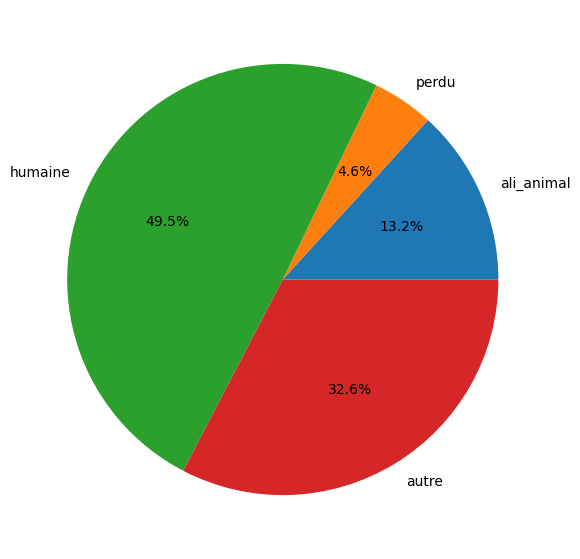

In [47]:
from matplotlib import pyplot as plt

 
 
# Creating dataset
conso = ['ali_animal', 'perdu', 'humaine',
        'autre']
 
data = [ali_animal, perdu, humaine, autre]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = conso, autopct='%1.1f%%')
 
# show plot
plt.show()

### la partie concretement utilisee pour l'alimentation humaine represente 49,5% de la disponibilite interieure

# Question de Melanie: les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017, ceux qui ont le plus bénéficié d’aide depuis 2013, ceux ayant le plus/le moins de disponibilité/habitant

In [48]:
df_sous_nutri_popu=pd.merge(df_sous_nutrition[df_sous_nutrition['année']== 2017],df_population_2017,how='left', on='Zone')
df_sous_nutri_popu.head()

Zone Année_x  Valeur  année  Année_y  population
0     Afghanistan    2017    10.5   2017   2017.0   36296.113
1  Afrique du Sud    2017     3.1   2017   2017.0   57009.756
2         Albanie    2017     0.1   2017   2017.0    2884.169
3         Algérie    2017     1.3   2017   2017.0   41389.189
4       Allemagne    2017     0.0   2017   2017.0   82658.409

In [49]:
df_sous_nutri_popu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        203 non-null    object 
 1   Année_x     203 non-null    object 
 2   Valeur      203 non-null    float64
 3   année       203 non-null    int64  
 4   Année_y     201 non-null    float64
 5   population  201 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 11.1+ KB


In [50]:
mask=df_sous_nutri_popu['population'].isna()
df_sous_nutri_popu[mask]

Zone Année_x  Valeur  année  \
160  Royaume-Uni de Grande-Bretagne et d'Irlande du...    2017     0.0   2017   
184                                           Tchéquie    2017     0.0   2017   

     Année_y  population  
160      NaN         NaN  
184      NaN         NaN

In [51]:
df_sous_nutrition.loc[df_sous_nutrition['Zone']== 'Tchéquie','Zone']='Tchéquie (la)'
df_sous_nutrition.loc[df_sous_nutrition['Zone']== "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",'Zone']='Royaume-Uni'


In [52]:
df_sous_nutri_popu=pd.merge(df_sous_nutrition[df_sous_nutrition['année']== 2017],df_population_2017,how='left', on='Zone')
df_sous_nutri_popu.head()

Zone Année_x  Valeur  année  Année_y  population
0     Afghanistan    2017    10.5   2017     2017   36296.113
1  Afrique du Sud    2017     3.1   2017     2017   57009.756
2         Albanie    2017     0.1   2017     2017    2884.169
3         Algérie    2017     1.3   2017     2017   41389.189
4       Allemagne    2017     0.0   2017     2017   82658.409

In [53]:
df_sous_nutri_popu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        203 non-null    object 
 1   Année_x     203 non-null    object 
 2   Valeur      203 non-null    float64
 3   année       203 non-null    int64  
 4   Année_y     203 non-null    int64  
 5   population  203 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 11.1+ KB


In [54]:
df_population_2017.head()

Zone  Année  population
4      Afghanistan   2017   36296.113
10  Afrique du Sud   2017   57009.756
16         Albanie   2017    2884.169
22         Algérie   2017   41389.189
28       Allemagne   2017   82658.409

In [55]:
df_sous_nutrition.head()

Zone      Année  Valeur  année
0  Afghanistan  2012-2014     8.6   2013
1  Afghanistan  2013-2015     8.8   2014
2  Afghanistan  2014-2016     8.9   2015
3  Afghanistan  2015-2017     9.7   2016
4  Afghanistan       2017    10.5   2017

In [56]:
df_sous_nutri_popu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        203 non-null    object 
 1   Année_x     203 non-null    object 
 2   Valeur      203 non-null    float64
 3   année       203 non-null    int64  
 4   Année_y     203 non-null    int64  
 5   population  203 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 11.1+ KB


In [57]:
df_sous_nutri_popu[df_sous_nutri_popu.population.isna()]

Empty DataFrame
Columns: [Zone, Année_x, Valeur, année, Année_y, population]
Index: []

In [58]:
df_sous_nutri_popu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        203 non-null    object 
 1   Année_x     203 non-null    object 
 2   Valeur      203 non-null    float64
 3   année       203 non-null    int64  
 4   Année_y     203 non-null    int64  
 5   population  203 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 11.1+ KB


In [59]:
df_sous_nutri_popu.loc[df_sous_nutri_popu['Zone']== 'Tchéquie','Zone']='Tchéquie (la)'
df_sous_nutri_popu.loc[df_sous_nutri_popu['Zone']== "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",'Zone']='Royaume-Uni'


#### creer nouvelle colonne prop=valeur/pop

In [60]:
df_sous_nutri_popu['prop%']=df_sous_nutri_popu['Valeur']/df_sous_nutri_popu['population']*1e5
df_sous_nutri_popu.head()

Zone Année_x  Valeur  année  Année_y  population      prop%
0     Afghanistan    2017    10.5   2017     2017   36296.113  28.928718
1  Afrique du Sud    2017     3.1   2017     2017   57009.756   5.437666
2         Albanie    2017     0.1   2017     2017    2884.169   3.467203
3         Algérie    2017     1.3   2017     2017   41389.189   3.140917
4       Allemagne    2017     0.0   2017     2017   82658.409   0.000000

In [61]:
df_sous_nutri_popu_2017=df_sous_nutri_popu.loc[df_sous_nutri_popu['année']== 2017]
df_sous_nutri_popu_2017.head()

Zone Année_x  Valeur  année  Année_y  population      prop%
0     Afghanistan    2017    10.5   2017     2017   36296.113  28.928718
1  Afrique du Sud    2017     3.1   2017     2017   57009.756   5.437666
2         Albanie    2017     0.1   2017     2017    2884.169   3.467203
3         Algérie    2017     1.3   2017     2017   41389.189   3.140917
4       Allemagne    2017     0.0   2017     2017   82658.409   0.000000

## les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [62]:
df_sous_nutri_popu_2017_trie=df_sous_nutri_popu_2017.sort_values('prop%', ascending=False)
df_sous_nutri_popu_2017_trie.head(10)

Zone Année_x  Valeur  année  \
78                                        Haïti    2017     5.3   2017   
157  République populaire démocratique de Corée    2017    12.0   2017   
108                                  Madagascar    2017    10.5   2017   
103                                     Libéria    2017     1.8   2017   
100                                     Lesotho    2017     0.8   2017   
183                                       Tchad    2017     5.7   2017   
161                                      Rwanda    2017     4.2   2017   
121                                  Mozambique    2017     9.4   2017   
186                                 Timor-Leste    2017     0.4   2017   
0                                   Afghanistan    2017    10.5   2017   

     Année_y  population      prop%  
78      2017   10982.366  48.259182  
157     2017   25429.825  47.188685  
108     2017   25570.512  41.062924  
103     2017    4702.226  38.279742  
100     2017    2091.534  38.249438  
183     2017   15016.753  37.957606  
161     2017   11980.961  35.055619  
121     2017   28649.018  32.810898  
186     2017    1243.258  32.173531  
0       2017   36296.113  28.928718

## les pays qui ont le plus bénéficié d’aide depuis 2013

In [63]:
df_aide_alimentaire_trie=df_aide_alimentaire.sort_values('Valeur',ascending=False)
df_aide_alimentaire_trie.head(10)

Zone  Année               Produit  Valeur
363                    Éthiopie   2014              Céréales  265013
362                    Éthiopie   2013              Céréales  256196
1014  République arabe syrienne   2014              Céréales  225007
1297              Soudan du Sud   2014  Céréales Secondaires  213730
1294              Soudan du Sud   2014              Céréales  213730
1425                      Yémen   2016              Céréales  196027
1013  République arabe syrienne   2013              Céréales  189623
1015  République arabe syrienne   2015              Céréales  181475
357                    Éthiopie   2013          Blé et Farin  181066
1421                      Yémen   2016          Blé et Farin  179332

In [64]:
df_aide_pays=df_aide_alimentaire.groupby('Zone')['Valeur'].sum()
df_aide_pays.head(10)

Zone
Afghanistan                        185452
Algérie                             81114
Angola                               5014
Bangladesh                         348188
Bhoutan                              2666
Bolivie (État plurinational de)         6
Burkina Faso                        64812
Burundi                             77318
Bénin                               22224
Cambodge                            25780
Name: Valeur, dtype: int64

In [78]:
# voici ci-dessous la liste finale en ordre decroissant des pays ayant recu le plus d'aide

In [65]:
df_aide_pays.sort_values(ascending=False,inplace=True)
df_aide_pays.head(10)

Zone
République arabe syrienne           1858943
Éthiopie                            1381294
Yémen                               1206484
Soudan du Sud                        695248
Soudan                               669784
Kenya                                552836
Bangladesh                           348188
Somalie                              292678
République démocratique du Congo     288502
Niger                                276344
Name: Valeur, dtype: int64

## les pays ayant le plus/le moins de disponibilité/habitant

In [66]:
df_dispo_popu_2017.head()

Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    0.0   
1  Afghanistan        Agrumes, Autres  vegetale                    0.0   
2  Afghanistan  Aliments pour enfants  vegetale                    0.0   
3  Afghanistan                 Ananas  vegetale                    0.0   
4  Afghanistan                Bananes  vegetale                    0.0   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  0.0                                             5.0   
1                  0.0                                             1.0   
2                  0.0                                             1.0   
3                  0.0                                             0.0   
4                  0.0                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.72        
1                                               1.29        
2                                               0.06        
3                                               0.00        
4                                               2.70        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                               0.20               
1                                               0.01               
2                                               0.01               
3                                               0.00               
4                                               0.02               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.77          
1                                               0.02          
2                                               0.03          
3                                               0.00          
4                                               0.05          

   Disponibilité intérieure  ...  Importations - Quantité  Nourriture  Pertes  \
0                      53.0  ...                      0.0        53.0     0.0   
1                      41.0  ...                     40.0        39.0     2.0   
2                       2.0  ...                      2.0         2.0     0.0   
3                       0.0  ...                      0.0         0.0     0.0   
4                      82.0  ...                     82.0        82.0     0.0   

   Production  Semences  Traitement  Variation de stock  Année  population  \
0        53.0       0.0         0.0                 0.0   2017   36296.113   
1         3.0       0.0         0.0                 0.0   2017   36296.113   
2         0.0       0.0         0.0                 0.0   2017   36296.113   
3         0.0       0.0         0.0                 0.0   2017   36296.113   
4         0.0       0.0         0.0                 0.0   2017   36296.113   

   Disponibilité alimentaire (Kcal/jour)  
0                            181480565.0  
1                             36296113.0  
2                             36296113.0  
3                                    0.0  
4                            145184452.0  

[5 rows x 21 columns]

In [67]:
df_dispo_popu_2017['dispo/habitant']=df_dispo_popu_2017['Disponibilité intérieure']/df_dispo_popu_2017['population']*1e3
df_dispo_popu_2017.head()

Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    0.0   
1  Afghanistan        Agrumes, Autres  vegetale                    0.0   
2  Afghanistan  Aliments pour enfants  vegetale                    0.0   
3  Afghanistan                 Ananas  vegetale                    0.0   
4  Afghanistan                Bananes  vegetale                    0.0   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  0.0                                             5.0   
1                  0.0                                             1.0   
2                  0.0                                             1.0   
3                  0.0                                             0.0   
4                  0.0                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.72        
1                                               1.29        
2                                               0.06        
3                                               0.00        
4                                               2.70        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                               0.20               
1                                               0.01               
2                                               0.01               
3                                               0.00               
4                                               0.02               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.77          
1                                               0.02          
2                                               0.03          
3                                               0.00          
4                                               0.05          

   Disponibilité intérieure  ...  Nourriture  Pertes  Production  Semences  \
0                      53.0  ...        53.0     0.0        53.0       0.0   
1                      41.0  ...        39.0     2.0         3.0       0.0   
2                       2.0  ...         2.0     0.0         0.0       0.0   
3                       0.0  ...         0.0     0.0         0.0       0.0   
4                      82.0  ...        82.0     0.0         0.0       0.0   

   Traitement  Variation de stock  Année  population  \
0         0.0                 0.0   2017   36296.113   
1         0.0                 0.0   2017   36296.113   
2         0.0                 0.0   2017   36296.113   
3         0.0                 0.0   2017   36296.113   
4         0.0                 0.0   2017   36296.113   

   Disponibilité alimentaire (Kcal/jour)  dispo/habitant  
0                            181480565.0        1.460211  
1                             36296113.0        1.129598  
2                             36296113.0        0.055102  
3                                    0.0        0.000000  
4                            145184452.0        2.259195  

[5 rows x 22 columns]

In [68]:
df_dispo_popu_2017.nlargest(10, 'dispo/habitant')

Zone             Produit   Origine  Aliments pour animaux  \
4641    Eswatini        Sucre, canne  vegetale                    0.0   
2163      Brésil        Sucre, canne  vegetale                 6900.0   
5811      Guyana        Sucre, canne  vegetale                  178.0   
8958     Maurice        Sucre, canne  vegetale                    0.0   
1613      Belize        Sucre, canne  vegetale                    0.0   
14539    Vanuatu  Coco (Incl Coprah)  vegetale                    0.0   
4734       Fidji        Sucre, canne  vegetale                    0.0   
5562   Guatemala        Sucre, canne  vegetale                   32.0   
13843  Thaïlande        Sucre, canne  vegetale                    0.0   
3917        Cuba        Sucre, canne  vegetale                 1800.0   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
4641                   0.0                                             0.0   
2163              347309.0                                            13.0   
5811                  51.0                                             0.0   
8958                   0.0                                             0.0   
1613                   0.0                                             0.0   
14539                381.0                                           457.0   
4734                   0.0                                             0.0   
5562                 231.0                                             0.0   
13843                  0.0                                            49.0   
3917                   0.0                                             0.0   

       Disponibilité alimentaire en quantité (kg/personne/an)  \
4641                                                0.00        
2163                                               16.47        
5811                                                0.00        
8958                                                0.00        
1613                                                0.00        
14539                                             150.20        
4734                                                0.00        
5562                                                0.00        
13843                                              61.11        
3917                                                0.00        

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
4641                                                0.00               
2163                                                0.09               
5811                                                0.00               
8958                                                0.00               
1613                                                0.00               
14539                                              37.86               
4734                                                0.00               
5562                                                0.00               
13843                                               0.33               
3917                                                0.00               

       Disponibilité de protéines en quantité (g/personne/jour)  \
4641                                                0.00          
2163                                                0.05          
5811                                                0.00          
8958                                                0.00          
1613                                                0.00          
14539                                               4.53          
4734                                                0.00          
5562                                                0.00          
13843                                               0.17          
3917                                                0.00          

       Disponibilité intérieure  ...  Nourriture   Pertes  Production  \
4641                     5450

In [69]:
df_dispo_popu_2017.nsmallest(10, 'dispo/habitant')

Zone                   Produit   Origine  \
1676                Bermudes       Oranges, Mandarines  vegetale   
6560                 Irlande     Aliments pour enfants  vegetale   
15408  États-Unis d'Amérique  Plantes Oleiferes, Autre  vegetale   
8106              Luxembourg                      Noix  vegetale   
10799               Pays-Bas     Aliments pour enfants  vegetale   
10060       Nouvelle-Zélande     Aliments pour enfants  vegetale   
7004                Jamaïque               Racines nda  vegetale   
13162                 Suisse     Aliments pour enfants  vegetale   
15173    Émirats arabes unis          Céréales, Autres  vegetale   
4026                Danemark     Aliments pour enfants  vegetale   

       Aliments pour animaux  Autres Utilisations  \
1676                     0.0                  0.0   
6560                     0.0                  0.0   
15408                    0.0                 36.0   
8106                     0.0                  0.0   
10799                    0.0                  0.0   
10060                    0.0                  0.0   
7004                     0.0                  0.0   
13162                    0.0                  0.0   
15173                    1.0                  1.0   
4026                     0.0                  0.0   

       Disponibilité alimentaire (Kcal/personne/jour)  \
1676                                             17.0   
6560                                              0.0   
15408                                             0.0   
8106                                              3.0   
10799                                             0.0   
10060                                             0.0   
7004                                             19.0   
13162                                             0.0   
15173                                             0.0   
4026                                              0.0   

       Disponibilité alimentaire en quantité (kg/personne/an)  \
1676                                               45.85        
6560                                                0.00        
15408                                               0.02        
8106                                                0.49        
10799                                               0.00        
10060                                               0.00        
7004                                                8.34        
13162                                               0.00        
15173                                               0.00        
4026                                                0.00        

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
1676                                                0.04               
6560                                                0.00               
15408                                               0.02               
8106                                                0.21               
10799                                               0.00               
10060                                               0.00               
7004                                                0.05               
13162                                               0.00               
15173                                               0.00               
4026                                                0.00               

       Disponibilité de protéines en quantité (g/personne/jour)  \
1676                                                0.25          
6560                                                0.00          
15408                                               0.01          
8106                                                0.05          
10799                                               0.00          
10060                                               0.00          
7004                                                0.27          
13162             

# Question de Julien: l’utilisation des céréales,notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux

Production + Importations – Exportations + Variation de stock = Disponibilité intérieure = Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations

In [70]:
sorted(df_dispo_popu_2017.Produit.unique())

['Abats Comestible',
 'Agrumes, Autres',
 'Alcool, non Comestible',
 'Aliments pour enfants',
 'Ananas',
 'Animaux Aquatiques Autre',
 'Arachides Decortiquees',
 'Avoine',
 'Bananes',
 'Bananes plantains',
 'Beurre, Ghee',
 'Bière',
 'Blé',
 'Boissons Alcooliques',
 'Boissons Fermentés',
 'Café',
 'Cephalopodes',
 'Citrons & Limes',
 'Coco (Incl Coprah)',
 'Crustacés',
 'Crème',
 'Céréales, Autres',
 'Dattes',
 'Edulcorants Autres',
 'Feve de Cacao',
 'Fruits, Autres',
 'Girofles',
 'Graines Colza/Moutarde',
 'Graines de coton',
 'Graines de tournesol',
 'Graisses Animales Crue',
 'Haricots',
 'Huil Plantes Oleif Autr',
 'Huile Graines de Coton',
 "Huile d'Arachide",
 "Huile d'Olive",
 'Huile de Coco',
 'Huile de Colza&Moutarde',
 'Huile de Germe de Maïs',
 'Huile de Palme',
 'Huile de Palmistes',
 'Huile de Soja',
 'Huile de Son de Riz',
 'Huile de Sésame',
 'Huile de Tournesol',
 'Huiles de Foie de Poisso',
 'Huiles de Poissons',
 'Ignames',
 'Lait - Excl Beurre',
 'Légumes, Autres',

In [71]:
cereales=['Avoine','Blé','Céréales, Autres','Maïs','Millet','Orge','Riz (Eq Blanchi)','Seigle','Sorgho']

In [72]:
ali_animal=df_dispo_popu_2017[df_dispo_popu_2017.Produit.isin(cereales)]['Aliments pour animaux'].sum()
perdu=df_dispo_popu_2017[df_dispo_popu_2017.Produit.isin(cereales)]['Pertes'].sum()
humaine=df_dispo_popu_2017[df_dispo_popu_2017.Produit.isin(cereales)]['Nourriture'].sum()
total=df_dispo_popu_2017[df_dispo_popu_2017.Produit.isin(cereales)]['Disponibilité intérieure'].sum()
autre=total-(humaine+perdu+ali_animal)

In [73]:
df_dispo_popu_2017[df_dispo_popu_2017.Produit.isin(cereales)]

Zone           Produit   Origine  Aliments pour animaux  \
7       Afghanistan               Blé  vegetale                    0.0   
12      Afghanistan  Céréales, Autres  vegetale                    0.0   
32      Afghanistan              Maïs  vegetale                  200.0   
34      Afghanistan            Millet  vegetale                    0.0   
40      Afghanistan              Orge  vegetale                  360.0   
...             ...               ...       ...                    ...   
15545  Îles Salomon  Céréales, Autres  vegetale                    0.0   
15568  Îles Salomon              Maïs  vegetale                    0.0   
15575  Îles Salomon              Orge  vegetale                    0.0   
15591  Îles Salomon  Riz (Eq Blanchi)  vegetale                    0.0   
15593  Îles Salomon            Sorgho  vegetale                    0.0   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
7                      0.0                                          1369.0   
12                     0.0                                             0.0   
32                     0.0                                            21.0   
34                     0.0                                             3.0   
40                     0.0                                            26.0   
...                    ...                                             ...   
15545                  0.0                                             0.0   
15568                  0.0                                             1.0   
15575                  0.0                                             0.0   
15591                 12.0                                           623.0   
15593                  0.0                                             0.0   

       Disponibilité alimentaire en quantité (kg/personne/an)  \
7                                                 160.23        
12                                                  0.00        
32                                                  2.50        
34                                                  0.40        
40                                                  2.92        
...                                                  ...        
15545                                               0.00        
15568                                               0.15        
15575                                               0.07        
15591                                              63.76        
15593                                               0.00        

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
7                                                   4.69               
12                                                  0.00               
32                                                  0.30               
34                                                  0.02               
40                                                  0.24               
...                                                  ...               
15545                                               0.00               
15568                                               0.01               
15575                                               0.00               
15591                                               1.36               
15593                                               0.00               

       Disponibilité de protéines en quantité (g/personne/jour)  \
7                                                  36.91          
12                                                  0.00          
32                                                  0.56          
34                                                  0.08          
40                                                  0.79          
...                                                  ...          
15545                                               0.00          
15568  

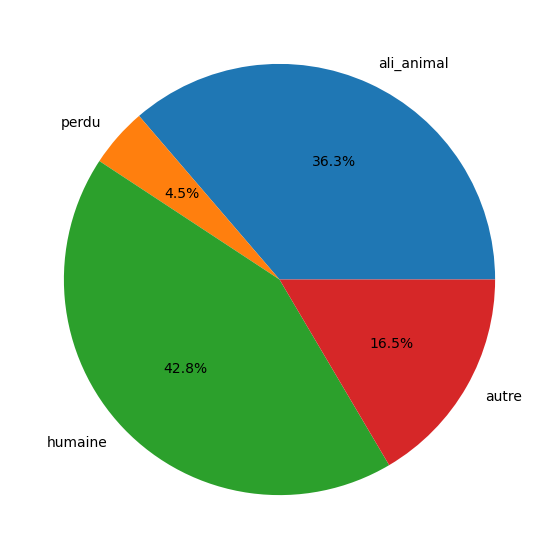

In [74]:
from matplotlib import pyplot as plt

 
 
# Creating dataset
conso = ['ali_animal', 'perdu', 'humaine',
        'autre']
 
data = [ali_animal, perdu, humaine, autre]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = conso, autopct='%1.1f%%')
 
# show plot
plt.show()

In [79]:
## 42,8% pour la partie humaine et 36,3% pour la partie animale, une difference de seuelement 6% dans l'utilisation des cereales

##  L’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition(l’exportation par rapport à la production)

In [75]:
mask=(df_dispo_popu_2017.Zone=='Thaïlande')&(df_dispo_popu_2017.Produit=='Manioc')
df_dispo_popu_2017[mask]

Zone Produit   Origine  Aliments pour animaux  \
13809  Thaïlande  Manioc  vegetale                 1800.0   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
13809               2081.0                                            40.0   

       Disponibilité alimentaire en quantité (kg/personne/an)  \
13809                                               13.0        

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
13809                                               0.05               

       Disponibilité de protéines en quantité (g/personne/jour)  \
13809                                               0.14          

       Disponibilité intérieure  ...  Nourriture  Pertes  Production  \
13809                    6264.0  ...       871.0  1511.0     30228.0   

       Semences  Traitement  Variation de stock  Année  population  \
13809       0.0         0.0                 0.0   2017    69209.81   

       Disponibilité alimentaire (Kcal/jour)  dispo/habitant  
13809                           2.768392e+09       90.507401  

[1 rows x 22 columns]

In [76]:
df_dispo_popu_2017[mask].iloc[:,:16]

Zone Produit   Origine  Aliments pour animaux  \
13809  Thaïlande  Manioc  vegetale                 1800.0   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
13809               2081.0                                            40.0   

       Disponibilité alimentaire en quantité (kg/personne/an)  \
13809                                               13.0        

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
13809                                               0.05               

       Disponibilité de protéines en quantité (g/personne/jour)  \
13809                                               0.14          

       Disponibilité intérieure  Exportations - Quantité  \
13809                    6264.0                  25214.0   

       Importations - Quantité  Nourriture  Pertes  Production  Semences  
13809                   1250.0       871.0  1511.0     30228.0       0.0

In [97]:
export_dispo_interieur=((df_dispo_popu_2017[mask]['Exportations - Quantité'])/(df_dispo_popu_2017[mask]['Disponibilité intérieure']))

print(" l' exportation de manioc est  {:,.2f} fois plus importante en quantite que la disponibilite inteieure en manioc".format(export_dispo_interieur.iloc[0]))

 l' exportation de manioc est  4.03 fois plus importante en quantite que la disponibilite inteieure en manioc


In [81]:
export_dispo_interieur.iloc[0]

4.02522349936143

In [82]:
## utilisation iloc[0] car sinon string et probleme format

In [88]:
df_sous_nutrition_2017.loc[df_sous_nutrition_2017['Zone']=='Thaïlande']

Zone  Année  Valeur  année
1114  Thaïlande   2017     6.2   2017

In [ ]:
## 6,2 millions de personnes en sous nutrition en thailande 

In [89]:
df_population_2017.loc[df_population_2017['Zone']=='Thaïlande']

Zone  Année  population
1312  Thaïlande   2017    69209.81

In [90]:
## population en millier d'habitants

In [96]:
df_sous_nutri_popu_2017.loc[df_sous_nutri_popu_2017['Zone']=='Thaïlande']

Zone Année_x  Valeur  année  Année_y  population     prop%
185  Thaïlande    2017     6.2   2017     2017    69209.81  8.958268

## Ce qui implique que si une plus grande partie été utilisée pour la consommation interieure cela viendrait reduire l'impact de la sous-nutrition de la population en Thaïlande 

In [ ]:
exp_prod=df_dispo_popu_2017[mask]['Exportations - Quantité']/df_dispo_popu_2017[mask]['Production']*100
print("l'exportation represente {:,.2f}% de la production de manioc".format(exp_prod.iloc[0]))


En d'autre terme, 83,41% de la production de manioc est exportée alors qu'elle pourrait servir pour reduire la sous-nutrition du pays